In [1]:
pip install torchvision

   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.3 MB 2.8 MB/s eta 0:00:02
   ------------------- -------------------- 2.1/4.3 MB 5.9 MB/s eta 0:00:01
   ------------------------------- -------- 3.4/4.3 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 4.3/4.3 MB 5.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import datasets
import torchvision.transforms.v2

In [2]:
pip install ipywidgets

  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl (914 kB)
Using cached widgetsnbextension-4.0.15-py3-none-any.whl (2.2 MB)

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from datasets import load_dataset

# Укажите тот же путь, который вы использовали при скачивании
cache_dir = "./my_dataset_folder"

# Библиотека проверит папку и мгновенно загрузит данные из кэша
dataset = load_dataset("deepcopy/MathWriting-human", cache_dir=cache_dir)



Generating val split: 100%|██████████| 15674/15674 [00:00<00:00, 152794.87 examples/s]


In [12]:
sample = dataset["train"][0]
image = sample["image"]
latex = sample["latex"]

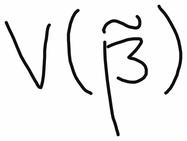

In [13]:
image.convert("L")

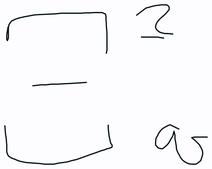

In [4]:
image

In [134]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
latex

'\\Xi_{q}^{z}'

In [136]:
sample

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=125x32>,
 'latex': 'u_{0}=\\frac{4}{(n\\pi)^{2}}dQU_{el}',
 'sample_id': '05607d04dfabb922',
 'split_tag': 'train',
 'data_type': 'human'}

In [137]:
dataset["train"]

Dataset({
    features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
    num_rows: 229864
})

In [138]:
from transformers import BeitModel, BeitConfig
import torch

KeyboardInterrupt: 

In [13]:
model = BeitModel.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")

config.json: 0.00B [00:00, ?B/s]

E:\Projects_pycharm\AIboardNotes2\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ХХХ\.cache\huggingface\hub\models--microsoft--beit-base-patch16-224-pt22k-ft22k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

In [18]:
Beit = model

In [19]:
Beit

BeitModel(
  (embeddings): BeitEmbeddings(
    (patch_embeddings): BeitPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BeitEncoder(
    (layer): ModuleList(
      (0): BeitLayer(
        (attention): BeitAttention(
          (attention): BeitSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=False)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (relative_position_bias): BeitRelativePositionBias()
          )
          (output): BeitSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): BeitIntermediate(
          (dense): Linear(in_features=768, out_fea

In [8]:
train_dataset = dataset["train"]

In [9]:
train_dataset

Dataset({
    features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
    num_rows: 229864
})

In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
    transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
    #transforms.ToTensor(),                        # [1, H, W], float32 [0,1]
])

In [9]:
image.size

(212, 169)

In [10]:
from PIL import ImageEnhance

In [11]:
ImageEnhance.Brightness(image)

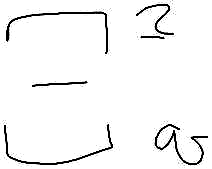

In [12]:
transform(image)

In [23]:
H

480

In [22]:
W = int(os.getenv("W"))
H = int(os.getenv("H"))

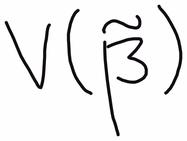

In [30]:
dataset["train"][0]["image"]

In [31]:
from datasets import load_dataset
from torchvision import transforms
from tqdm import trange
from dotenv import load_dotenv
import os

load_dotenv()

W = os.getenv("W")
H = os.getenv("H")

# путь при скачивании
cache_dir = "./my_dataset_folder"
print("загрузка...")
# библиотека проверит папку и мгновенно загрузит данные из кэша
dataset = load_dataset("deepcopy/MathWriting-human", cache_dir=cache_dir)
print("загружено успешно")

transform = transforms.Compose([
    transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
    transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
    transforms.ToTensor(),                        # [1, H, W], float32 [0,1]
])

tr = dataset["train"]

images = []
latex = []

for i in trange(len(tr)):
    cur = tr[i]
    im = transform(cur["image"])
    txt = cur["latex"]
    print(im)
    print(im.size())
    images.append(im)
    latex.append(txt)
    if i == 0:
        break

images = torch.cat(images)

загрузка...
загружено успешно


  0%|          | 0/229864 [00:00<?, ?it/s]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
torch.Size([1, 141, 187])


In [33]:
images[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [6]:
latex

['V(\\tilde{\\beta})']

In [7]:
import torch

In [8]:
new_im = torch.stack(images)

In [5]:
from dotenv import load_dotenv
import os

load_dotenv()

print(int(os.getenv("W")))

640


In [147]:
import torch

In [9]:
W = 640
H = 480

In [51]:
image = images[0]

In [53]:
image

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [54]:
image.shape

torch.Size([141, 187])

In [55]:
class SmartResizer(torch.nn.Module):
    def forward(self, img):
        h, w = img.shape
        if (img.shape)[0] > W or (img.shape)[1] > H:
            k = min(W / img.shape[0], H / img.shape[1])
            #print(k)
            resizer = transforms.Compose([
                transforms.Resize((int(k * img.shape[1]), int(k * img.shape[0])))
            ])
            img = resizer(img)
        dx = W - img.shape[0]
        dy = H - img.shape[1]
        pl = 0 # left
        pu = 0 # up
        pr = 0 # right
        pd = 0 # down
        if dx > 0:
            # Add in dim=-1
            border = random.randint(1, dx + 1)
            pl = border - 1
            pr = dx - border
        if dy > 0:
            # Add in dim=-1
            border = random.randint(1, dy + 1)
            pd = border - 1
            pu = dy - border

        padder = transforms.Pad((pl, pu, pr, pd)) # left, top, right and bottom
        img = padder(img)

        return img

In [56]:
import random


In [57]:
test_transform = transforms.Compose([
    SmartResizer()
])

In [58]:
image = images[0]

In [59]:
image

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [60]:
a = test_transform(image)

TypeError: '>' not supported between instances of 'int' and 'str'

In [18]:
a.size

NameError: name 'a' is not defined

In [19]:
image.size

<function Tensor.size>

In [20]:
from torchvision import transforms

In [21]:
a

NameError: name 'a' is not defined

Resize(size=(5, 5), interpolation=bilinear, max_size=None, antialias=True)